<a href="https://colab.research.google.com/github/sss3215566/sss3215566.github.io/blob/main/M1233012_%E7%9F%B3%E9%9B%85%E5%A7%8D_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical  # Corrected import statement
import numpy as np

np.random.seed(15)

# Read MNIST data
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()

# Translation of data
X_Train4D = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')
X_Test4D = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Standardize feature data
X_Train4D_norm = X_Train4D / 255
X_Test4D_norm = X_Test4D /255



In [ ]:
from keras.utils import to_categorical

# Label Onehot-encoding
y_TrainOneHot = to_categorical(y_Train)
y_TestOneHot = to_categorical(y_Test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
model = Sequential()
# Create CN layer 1
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu',
                 name='conv2d_1'))
# Create Max-Pool 1
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_1'))

# Create CN layer 2
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu',
                 name='conv2d_2'))
# Create Max-Pool 2
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_2'))

# Create CN layer 3
model.add(Conv2D(filters=48,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu',
                 name='conv2d_3'))
# Create Max-Pool 3
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_3'))

# Add Dropout layer
model.add(Dropout(0.25, name='dropout_1'))

In [ ]:
model.add(Flatten(name='flatten_1'))

In [ ]:
model.add(Dense(128, activation='relu', name='dense_1'))
model.add(Dropout(0.5, name='dropout_2'))

In [ ]:
model.add(Dense(10, activation='softmax', name='dense_2'))

In [ ]:
model.summary()
print("")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 36)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 48)          43248     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 48)          0

In [ ]:
# 定義訓練方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 開始訓練
train_history = model.fit(x=X_Train4D_norm,
                          y=y_TrainOneHot, validation_split=0.2,
                          epochs=10, batch_size=500, verbose=2)

Epoch 1/10
96/96 - 92s - loss: 0.7908 - accuracy: 0.7407 - val_loss: 0.1250 - val_accuracy: 0.9628 - 92s/epoch - 954ms/step
Epoch 2/10
96/96 - 76s - loss: 0.1786 - accuracy: 0.9476 - val_loss: 0.0773 - val_accuracy: 0.9760 - 76s/epoch - 793ms/step
Epoch 3/10
96/96 - 72s - loss: 0.1181 - accuracy: 0.9645 - val_loss: 0.0626 - val_accuracy: 0.9809 - 72s/epoch - 752ms/step
Epoch 4/10
96/96 - 77s - loss: 0.0927 - accuracy: 0.9719 - val_loss: 0.0525 - val_accuracy: 0.9837 - 77s/epoch - 804ms/step
Epoch 5/10
96/96 - 74s - loss: 0.0769 - accuracy: 0.9774 - val_loss: 0.0489 - val_accuracy: 0.9858 - 74s/epoch - 773ms/step
Epoch 6/10
96/96 - 72s - loss: 0.0642 - accuracy: 0.9806 - val_loss: 0.0414 - val_accuracy: 0.9872 - 72s/epoch - 746ms/step
Epoch 7/10
96/96 - 72s - loss: 0.0575 - accuracy: 0.9831 - val_loss: 0.0380 - val_accuracy: 0.9883 - 72s/epoch - 746ms/step
Epoch 8/10
96/96 - 74s - loss: 0.0484 - accuracy: 0.9851 - val_loss: 0.0380 - val_accuracy: 0.9891 - 74s/epoch - 776ms/step
Epoch 9/

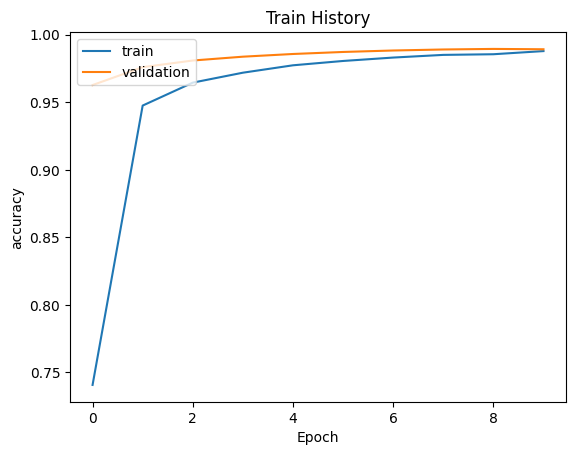

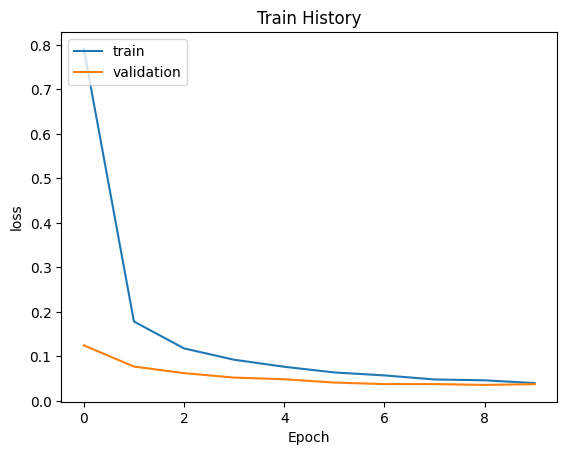

In [ ]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

def plot_images_labels_predict(images, labels, prediction, idx, num=15):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "l=" + str(labels[idx])
        if len(prediction) > 0:
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))
        else:
            title = "l={}".format(str(labels[idx]))
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
#使用函數 show_train_history 顯示 accuracy 在 train 與 evaluation 的差異與 loss 在 train 與 evaluation 的差異如下:

show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

In [ ]:
scores = model.evaluate(X_Test4D_norm, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

313/313 [==============================] - 7s 21ms/step - loss: 0.0275 - accuracy: 0.9914

	[Info] Accuracy of testing data = 99.1%


In [ ]:
print("\t[Info] Making prediction of X_Test4D_norm")
prediction = model.predict(X_Test4D_norm)# Making prediction and save result to prediction
prediction = np.argmax(prediction,axis=1)
print()
print("\t[Info] Show 15 prediction result (From 220):")
print("%s\n" % (prediction[220:235]))


	[Info] Making prediction of X_Test4D_norm
313/313 [==============================] - 5s 16ms/step

	[Info] Show 15 prediction result (From 220):
[7 2 2 7 1 2 8 4 1 7 3 3 8 8 7]



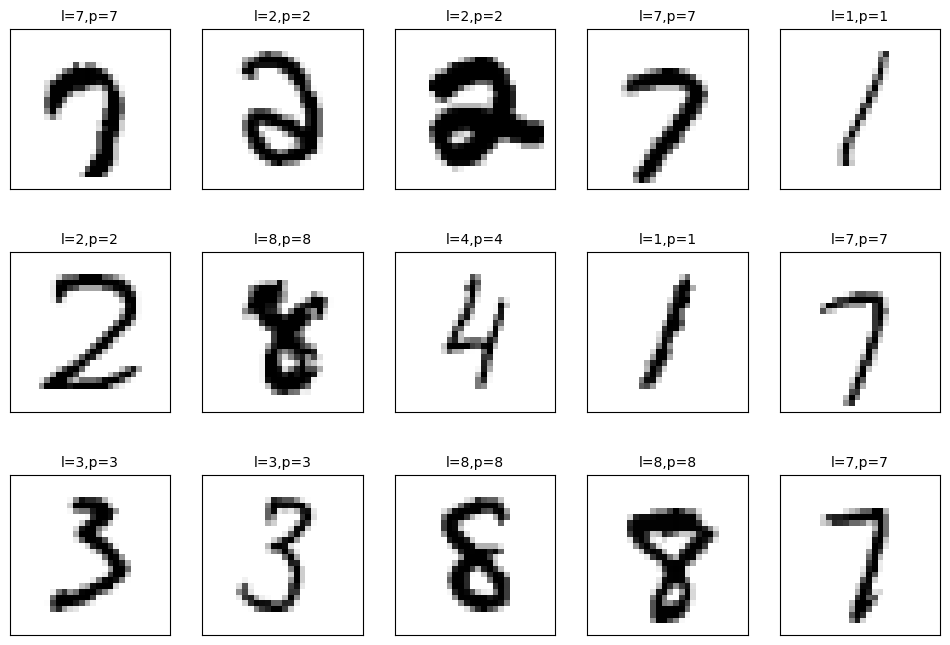

In [ ]:
plot_images_labels_predict(X_Test, y_Test, prediction, idx=220)